In [5]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pickle
import pandas as pd

In [6]:
def generate_2d_rotation(theta=0, acorn=None):
    if acorn is not None:
        np.random.seed(acorn)

    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

    return R

In [7]:
def pdf(x):
    mu01 = np.array([-0.5, 0.5])
    mu02 = np.array([0.5, -0.5])
    mu11 = np.array([0.5, 0.5])
    mu12 = np.array([-0.5, -0.5])
    cov = 0.25 * np.eye(2)
    inv_cov = np.linalg.inv(cov)

    p0 = (
        np.exp(-(x - mu01) @ inv_cov @ (x - mu01).T)
        + np.exp(-(x - mu02) @ inv_cov @ (x - mu02).T)
    ) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))

    p1 = (
        np.exp(-(x - mu11) @ inv_cov @ (x - mu11).T)
        + np.exp(-(x - mu12) @ inv_cov @ (x - mu12).T)
    ) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))

    return p0 / (p0 + p1)

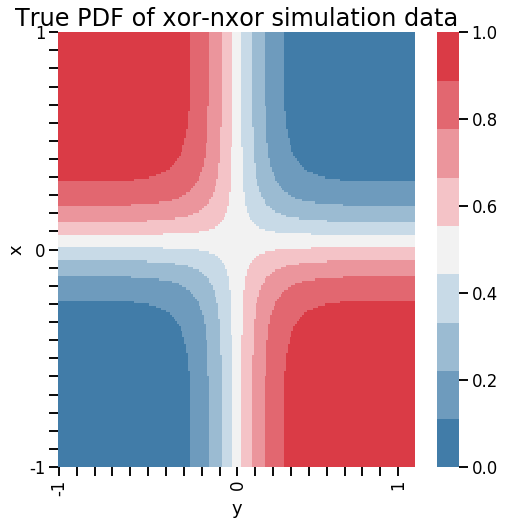

In [8]:
delta = 0.01
x = np.arange(-1, 1, step=delta)
y = np.arange(-1, 1, step=delta)
x, y = np.meshgrid(x, y)
sample = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)

z = np.zeros(len(sample), dtype=float)
for ii, x in enumerate(sample):
    z[ii] = pdf(x)

data = pd.DataFrame(data={"x": sample[:, 0], "y": sample[:, 1], "z": z})
data = data.pivot(index="x", columns="y", values="z")

sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = sns.diverging_palette(240, 10, n=9)
ax1 = sns.heatmap(data, ax=ax, vmin=0, vmax=1, cmap=cmap)
ax1.set_xticklabels(
    ["-1", "", "", "", "", "", "", "", "", "", "0", "", "", "", "", "", "", "", "", "1"]
)
ax1.set_yticklabels(
    [
        "-1",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "0",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "1",
    ]
)
ax.set_title("True PDF of xor-nxor simulation data", fontsize=24)
ax.invert_yaxis()

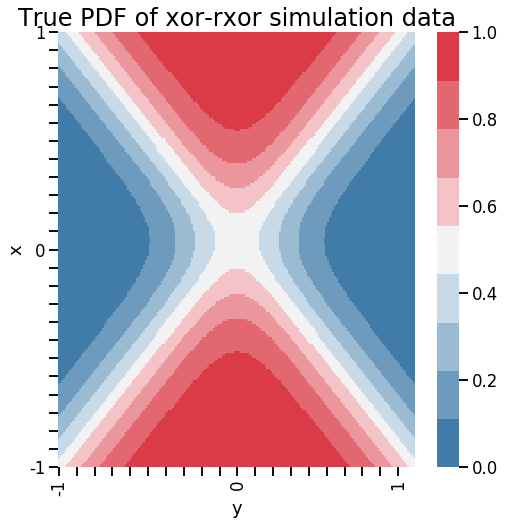

In [9]:
delta = 0.01
x = np.arange(-1, 1, step=delta)
y = np.arange(-1, 1, step=delta)
x, y = np.meshgrid(x, y)
sample = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)

z = np.zeros(len(sample), dtype=float)
R = generate_2d_rotation(theta=np.pi * 45 / 180)
for ii, x in enumerate(sample):
    z[ii] = pdf(R @ x)

data = pd.DataFrame(data={"x": sample[:, 0], "y": sample[:, 1], "z": z})
data = data.pivot(index="x", columns="y", values="z")

sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = sns.diverging_palette(240, 10, n=9)
ax1 = sns.heatmap(data, ax=ax, vmin=0, vmax=1, cmap=cmap)
ax1.set_xticklabels(
    ["-1", "", "", "", "", "", "", "", "", "", "0", "", "", "", "", "", "", "", "", "1"]
)
ax1.set_yticklabels(
    [
        "-1",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "0",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "",
        "1",
    ]
)
ax.set_title("True PDF of xor-rxor simulation data", fontsize=24)
ax.invert_yaxis()